In [1]:
#pip install nba-api

In [1]:
# pip install nbapy

In [1]:
from nbapy import game, shot_chart, player
from nba_api.stats.static import players
import nba_api.stats.endpoints
from nba_api.stats.static import teams
from nba_api.stats.endpoints import boxscorematchups
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.library.parameters import ContextMeasureSimple, LastNGames, LeagueID, Month, Period, SeasonTypeAllStar, AheadBehindNullable, ClutchTimeNullable, EndPeriodNullable, EndRangeNullable, GameSegmentNullable, LocationNullable, OutcomeNullable, PlayerPositionNullable, PointDiffNullable, PositionNullable, RangeTypeNullable, SeasonNullable, SeasonSegmentNullable, StartPeriodNullable, StartRangeNullable, ConferenceNullable, DivisionNullable

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
input_id = "2544"
game_log = player.GameLogs(player_id=input_id, season="2018-19").logs()
game_log.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [67]:
splits = player.Splits(player_id=input_id, season="2018-19").overall()
splits.columns

Index(['GROUP_SET', 'GROUP_VALUE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD',
       'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
       'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
       'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
       'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
       'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
       'DD2_RANK', 'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

In [68]:
splits = splits[['W', 'L','MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST',  'STL', 'BLK','TOV', 'PF',
       'PTS', 'PLUS_MINUS']]
splits

,W,L,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
0,28,27,35.2,10.1,19.9,0.51,2.0,5.9,0.339,5.1,...,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4,2.1


In [65]:
game_log = game_log[['GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS']]
game_log

,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
0,"MAR 29, 2019",LAL vs. CHA,W,32,11,19,0.579,4,7,0.571,...,0,3,3,9,0,0,6,1,27,14
1,"MAR 26, 2019",LAL vs. WAS,W,34,11,20,0.550,1,6,0.167,...,0,7,7,14,1,0,3,1,23,3
2,"MAR 24, 2019",LAL vs. SAC,W,35,9,22,0.409,3,6,0.500,...,2,9,11,11,2,1,4,1,29,5
3,"MAR 22, 2019",LAL vs. BKN,L,37,8,25,0.320,1,7,0.143,...,3,6,9,14,1,1,8,3,25,-2
4,"MAR 17, 2019",LAL @ NYK,L,35,11,26,0.423,0,6,0.000,...,2,4,6,8,0,1,2,2,33,9
5,"MAR 14, 2019",LAL @ TOR,L,32,12,23,0.522,1,5,0.200,...,0,4,4,6,1,0,4,2,29,0
6,"MAR 12, 2019",LAL @ CHI,W,33,15,23,0.652,2,4,0.500,...,1,9,10,4,2,0,5,2,36,9
7,"MAR 09, 2019",LAL vs. BOS,L,28,13,23,0.565,1,5,0.200,...,2,8,10,12,0,0,3,0,30,11
8,"MAR 06, 2019",LAL vs. DEN,L,31,13,22,0.591,2,7,0.286,...,0,7,7,7,1,1,4,4,31,-8
9,"MAR 04, 2019",LAL vs. LAC,L,42,9,18,0.500,1,6,0.167,...,0,8,8,6,1,1,2,3,27,-11


In [52]:
input_id = "2544"
shot_charts = shot_chart.ShotChart(player_id=input_id, season="2018-19").shot_chart()

shot_charts["MADE_MISS"] = ['made' if x == 1 else 'miss' for x in shot_charts['SHOT_MADE_FLAG']]

df = shot_charts[['ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', "SHOT_MADE_FLAG", "SHOT_ATTEMPTED_FLAG"]]

SHOT_TYPE = pd.DataFrame(shot_charts["SHOT_TYPE"].value_counts())
SHOT_TYPE

SHOT_TYPE['Volume'] = (SHOT_TYPE["SHOT_TYPE"]/SHOT_TYPE["SHOT_TYPE"].sum()).astype(float).map('{:,.2%}'.format)

shot_type_pct = SHOT_TYPE[["Volume"]]


In [53]:
df_2 = df[['SHOT_TYPE', "SHOT_MADE_FLAG"]]
df_2 = df_2.rename(columns={
    "SHOT_TYPE": "Shot Type",
    "SHOT_MADE_FLAG": "FG%"
})
fg_type = df_2.groupby(["Shot Type"]).mean()

fg_type["FG%"] = fg_type["FG%"].map('{:,.2%}'.format)



In [54]:
merged_type = pd.merge(shot_type_pct, fg_type, left_index=True, right_index=True)
merged_type

,Volume,FG%
2PT Field Goal,70.14%,58.20%
3PT Field Goal,29.86%,33.94%


In [56]:
df = pd.DataFrame(shot_charts["SHOT_ZONE_BASIC"].value_counts())
df['Volume'] = (df["SHOT_ZONE_BASIC"]/df["SHOT_ZONE_BASIC"].sum()).astype(float).map('{:,.2%}'.format)
zone_pct = df[["Volume"]]
zone_pct

,Volume
Restricted Area,43.01%
Above the Break 3,27.49%
Mid-Range,15.89%
In The Paint (Non-RA),11.14%
Left Corner 3,1.37%
Right Corner 3,1.10%


In [58]:
df_2 = shot_charts[['SHOT_ZONE_BASIC', "SHOT_MADE_FLAG"]]
df_2 = df_2.rename(columns={"SHOT_ZONE_BASIC": "Shot Type","SHOT_MADE_FLAG": "FG%"})
fg_zone = df_2.groupby(["Shot Type"]).mean()
fg_zone["FG%"] = fg_zone["FG%"].map('{:,.2%}'.format)
fg_zone

,FG%
Shot Type,
Above the Break 3,33.89%
In The Paint (Non-RA),30.33%
Left Corner 3,26.67%
Mid-Range,43.10%
Restricted Area,71.13%
Right Corner 3,41.67%


In [59]:
merged_zone = pd.merge(zone_pct, fg_zone, left_index=True, right_index=True)
merged_zone

,Volume,FG%
Restricted Area,43.01%,71.13%
Above the Break 3,27.49%,33.89%
Mid-Range,15.89%,43.10%
In The Paint (Non-RA),11.14%,30.33%
Left Corner 3,1.37%,26.67%
Right Corner 3,1.10%,41.67%


In [60]:
df = pd.DataFrame(shot_charts["SHOT_ZONE_RANGE"].value_counts())
df['Volume'] = (df["SHOT_ZONE_RANGE"]/df["SHOT_ZONE_RANGE"].sum()).astype(float).map('{:,.2%}'.format)
distance_pct = df[["Volume"]]

distance_pct

,Volume
Less Than 8 ft.,48.95%
24+ ft.,29.95%
16-24 ft.,11.14%
8-16 ft.,9.95%


In [62]:
df_2 = shot_charts[['SHOT_ZONE_RANGE', "SHOT_MADE_FLAG"]]
df_2 = df_2.rename(columns={"SHOT_ZONE_RANGE": "Shot Distance","SHOT_MADE_FLAG": "FG%"})
fg_distance = df_2.groupby(["Shot Distance"]).mean()
fg_distance["FG%"] = fg_distance["FG%"].map('{:,.2%}'.format)

#group_df

In [63]:
merged_distance = pd.merge(distance_pct, fg_distance, left_index=True, right_index=True)
merged_distance

,Volume,FG%
Less Than 8 ft.,48.95%,64.93%
24+ ft.,29.95%,33.84%
16-24 ft.,11.14%,45.08%
8-16 ft.,9.95%,40.37%


In [45]:
concat = pd.concat([merged_type, merged_zone])
final = pd.concat([concat, merged_distance])
final = final.reset_index()


In [47]:
final = final.rename(columns={"index": 'Location'})
final

,Location,Volume,FG%
0,2PT Field Goal,70.14%,58.20%
1,3PT Field Goal,29.86%,33.94%
2,Restricted Area,43.01%,71.13%
3,Above the Break 3,27.49%,33.89%
4,Mid-Range,15.89%,43.10%
5,In The Paint (Non-RA),11.14%,30.33%
6,Left Corner 3,1.37%,26.67%
7,Right Corner 3,1.10%,41.67%
8,Less Than 8 ft.,48.95%,64.93%
9,24+ ft.,29.95%,33.84%


In [11]:
game_info = boxscorematchups.BoxScoreMatchups(game_id='0041800406')

In [23]:
game_id='0041800406'
stats = game.BoxScore(game_id).players_stats()
print(stats)

       GAME_ID     TEAM_ID TEAM_ABBREVIATION     TEAM_CITY  PLAYER_ID  \
0   0041800406  1610612761               TOR       Toronto     202695   
1   0041800406  1610612761               TOR       Toronto    1627783   
2   0041800406  1610612761               TOR       Toronto     201188   
3   0041800406  1610612761               TOR       Toronto     201980   
4   0041800406  1610612761               TOR       Toronto     200768   
5   0041800406  1610612761               TOR       Toronto    1627832   
6   0041800406  1610612761               TOR       Toronto     201586   
7   0041800406  1610612761               TOR       Toronto    1626181   
8   0041800406  1610612761               TOR       Toronto    1628384   
9   0041800406  1610612761               TOR       Toronto     202391   
10  0041800406  1610612761               TOR       Toronto    1627775   
11  0041800406  1610612761               TOR       Toronto     201975   
12  0041800406  1610612761               TOR       

In [17]:
game_info.get_data_frames()

[        GAME_ID  OFF_TEAM_ID OFF_TEAM_ABBREVIATION OFF_TEAM_CITY  \
 0    0041800406   1610612761                   TOR       Toronto   
 1    0041800406   1610612761                   TOR       Toronto   
 2    0041800406   1610612761                   TOR       Toronto   
 3    0041800406   1610612761                   TOR       Toronto   
 4    0041800406   1610612761                   TOR       Toronto   
 ..          ...          ...                   ...           ...   
 154  0041800406   1610612744                   GSW  Golden State   
 155  0041800406   1610612744                   GSW  Golden State   
 156  0041800406   1610612744                   GSW  Golden State   
 157  0041800406   1610612744                   GSW  Golden State   
 158  0041800406   1610612744                   GSW  Golden State   
 
     OFF_TEAM_NICKNAME  OFF_PLAYER_ID   OFF_PLAYER_NAME  DEF_TEAM_ID  \
 0             Raptors         202695     Kawhi Leonard   1610612744   
 1             Raptors    

In [28]:
df = player_info.get_data_frames()[0]
df.columns

Index(['PERSON_ID', 'FIRST_NAME', 'LAST_NAME', 'DISPLAY_FIRST_LAST',
       'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'PLAYER_SLUG',
       'BIRTHDATE', 'SCHOOL', 'COUNTRY', 'LAST_AFFILIATION', 'HEIGHT',
       'WEIGHT', 'SEASON_EXP', 'JERSEY', 'POSITION', 'ROSTERSTATUS',
       'GAMES_PLAYED_CURRENT_SEASON_FLAG', 'TEAM_ID', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'TEAM_CODE', 'TEAM_CITY', 'PLAYERCODE',
       'FROM_YEAR', 'TO_YEAR', 'DLEAGUE_FLAG', 'NBA_FLAG', 'GAMES_PLAYED_FLAG',
       'DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER'],
      dtype='object')

In [29]:
player_data = []
for index, row in df.iterrows():
    data = {}
    data["player_id"] = row["PERSON_ID"]
    data["name"] = row["DISPLAY_FIRST_LAST"]
    data["school"] = row["SCHOOL"]
    data["country"] = row["COUNTRY"]
    data["height"] = row["HEIGHT"]
    data["weight"] = row["WEIGHT"]
    data["seasons"] = row["SEASON_EXP"]
    data["name"] = row["DISPLAY_FIRST_LAST"]
    data["draft_year"] = row["DRAFT_YEAR"]
    data["draft_round"] = row["DRAFT_ROUND"]
    data["draft_number"] = row["DRAFT_NUMBER"]
    player_data.append(data)
    
player_data

[{'player_id': 2544,
  'name': 'LeBron James',
  'school': 'St. Vincent-St. Mary HS (OH)',
  'country': 'USA',
  'height': '6-9',
  'weight': '250',
  'seasons': 17,
  'draft_year': '2003',
  'draft_round': '1',
  'draft_number': '1'}]

In [4]:
BBplayers = players.get_players()
BBteams = teams.get_teams()

In [5]:
durant = [player for player in BBplayers if player['full_name'] == 'Kevin Durant'][0]
print(durant["id"])
lakers = [name for name in BBteams if name['full_name']=='Oklahoma City Thunder'][0]
lakers_id = lakers['id']
print(lakers_id)

201142
1610612760


In [3]:
durant = shotchartdetail.ShotChartDetail(player_id='201142',team_id=1610612760, season_nullable='2014-15')

In [4]:
NewDF=durant.get_data_frames()

In [5]:
df = NewDF[0]
#list(df)

In [6]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [7]:
allshots = []
for index, row in df.iterrows():
    shot = {}
    shot["GAME_DATE"] = row["GAME_DATE"]
    shot["GAME_ID"] = row["GAME_ID"]
    shot["TEAM_NAME"] = row["TEAM_NAME"]
    shot["PLAYER_NAME"] = row["PLAYER_NAME"]
    shot["PERIOD"] = row["PERIOD"]
    shot["MINUTES_REMAINING"] = row["MINUTES_REMAINING"]
    shot["SECONDS_REMAINING"] = row["SECONDS_REMAINING"]
    shot["ACTION_TYPE"] = row["ACTION_TYPE"]
    shot["SHOT_TYPE"] = row["SHOT_TYPE"]
    shot["SHOT_DISTANCE"] = row["SHOT_DISTANCE"]
    shot["LOC_X"] = row["LOC_X"]
    shot["LOC_Y"] = row["LOC_Y"]
    shot["HTM"] = row["HTM"]
    shot["VTM"] = row["VTM"] 
    allshots.append(shot)

In [8]:
allshots

[{'GAME_DATE': '20141202',
  'GAME_ID': '0021400258',
  'TEAM_NAME': 'Oklahoma City Thunder',
  'PLAYER_NAME': 'Kevin Durant',
  'PERIOD': 1,
  'MINUTES_REMAINING': 10,
  'SECONDS_REMAINING': 28,
  'ACTION_TYPE': 'Jump Shot',
  'SHOT_TYPE': '3PT Field Goal',
  'SHOT_DISTANCE': 23,
  'LOC_X': 236,
  'LOC_Y': 6,
  'HTM': 'NOP',
  'VTM': 'OKC'},
 {'GAME_DATE': '20141202',
  'GAME_ID': '0021400258',
  'TEAM_NAME': 'Oklahoma City Thunder',
  'PLAYER_NAME': 'Kevin Durant',
  'PERIOD': 1,
  'MINUTES_REMAINING': 7,
  'SECONDS_REMAINING': 5,
  'ACTION_TYPE': 'Jump Shot',
  'SHOT_TYPE': '2PT Field Goal',
  'SHOT_DISTANCE': 16,
  'LOC_X': -119,
  'LOC_Y': 119,
  'HTM': 'NOP',
  'VTM': 'OKC'},
 {'GAME_DATE': '20141202',
  'GAME_ID': '0021400258',
  'TEAM_NAME': 'Oklahoma City Thunder',
  'PLAYER_NAME': 'Kevin Durant',
  'PERIOD': 2,
  'MINUTES_REMAINING': 7,
  'SECONDS_REMAINING': 32,
  'ACTION_TYPE': 'Jump Shot',
  'SHOT_TYPE': '2PT Field Goal',
  'SHOT_DISTANCE': 16,
  'LOC_X': -160,
  'LOC_Y': 

In [13]:
#Draw court
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=0.7, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [14]:
#shotchart_volume
def shotchart_volume(name, team, season):
    player_list = [player for player in BBplayers if player['full_name'] == str(name)][0]
    player_id = player_list["id"]
    team_list = [name for name in BBteams if name['full_name']== str(team)][0]
    team_id = team_list['id']
    
    shotchart = shotchartdetail.ShotChartDetail(player_id=str(player_id),team_id=int(team_id), season_nullable=str(season))
    
    chart_frames = shotchart.get_data_frames()
    df = chart_frames[0]
    
    x = df["LOC_X"]
    y = df["LOC_Y"]
    
    cmap=plt.cm.gist_heat_r
    joint_shot_chart = sns.jointplot(df.LOC_X, df.LOC_Y, stat_func=None,
                                 kind='hex', space=0, color=cmap(.2), cmap=cmap)

    joint_shot_chart.fig.set_size_inches(6,5.5)
    ax = joint_shot_chart.ax_joint
    draw_court(ax)
    ax.set_xlim(-250,250)
    ax.set_ylim(422.5, -47.5)
    ax.set_xlabel(f'{name} FGA \n{season} - {team}')
    ax.set_ylabel('')
    ax.tick_params(labelbottom='off', labelleft='off')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [15]:
def shotchart(name, team, season):
    player_list = [player for player in BBplayers if player['full_name'] == str(name)][0]
    player_id = player_list["id"]
    team_list = [name for name in BBteams if name['full_name']== str(team)][0]
    team_id = team_list['id']
    
    shotchart = shotchartdetail.ShotChartDetail(player_id=str(player_id),team_id=int(team_id), season_nullable=str(season))
    
    chart_frames = shotchart.get_data_frames()
    df = chart_frames[0]
    
    x = df["LOC_X"]
    y = df["LOC_Y"]
    
    plt.scatter(x,y, s=5, c="sandybrown")
    draw_court(outer_lines=True)
    plt.title(f'{name} FGA \n{season} - {team}')
    plt.xlim(-250,250)
    plt.ylim(422.5, -47.5)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [16]:
decade = ["2009-10", "2010-11", "2011-12","2012-13","2013-14","2014-15", "2015-16", "2016-17", "2017-18", "2018-19", "2019-20"]
five =  ["2015-16", "2016-17", "2017-18", "2018-19", "2019-20"]
three = ["2017-18", "2018-19", "2019-20"]
two = ["2018-19", "2019-20"]
one = ["2019-20"]

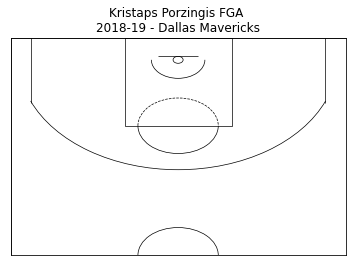

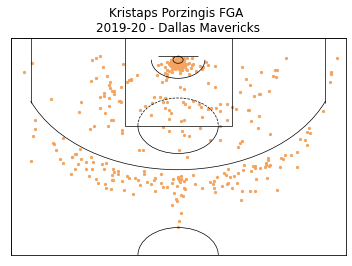

In [17]:
for season in two:
    shotchart("Kristaps Porzingis", "Dallas Mavericks", season)

In [ ]:
for season in two:
    try:
        shotchart_volume("Kristaps Porzingis", "Dallas Mavericks", season)
    except:
        pass